Logistic with permutation importance


In [1]:
from sklearn.inspection import permutation_importance
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p = "/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/src/data/variables_target_file"
sampled_df = pd.read_csv(p)
col = sampled_df.columns[:-3].values

sampled_df["Nb/Y"] = np.round(sampled_df["Nb"])/np.round(sampled_df["Y"])
sampled_df["FeOT/MgO"]= np.round(sampled_df["FeOT"])/np.round(sampled_df["MgO"])
sampled_df["La/Sm"] = np.round(sampled_df["La"])/np.round(sampled_df["Sm"])
sampled_df["Zr/Nb"] = np.round(sampled_df["Zr"])/np.round(sampled_df["Nb"])
sampled_df["Y/Nb"]= np.round(sampled_df["Y"])/np.round(sampled_df["Nb"])
sampled_df["Nb/La"] = np.round(sampled_df["Nb"])/np.round(sampled_df["La"])
sampled_df["Th/Yb"] = np.round(sampled_df["Th"])/np.round(sampled_df["Yb"])
sampled_df["Zr/Y"] = np.round(sampled_df["Zr"])/np.round(sampled_df["Y"])

newColsNames = np.array(["Nb/Y","FeOT/MgO","La/Sm","Zr/Nb","Y/Nb", "Nb/La", "Th/Yb", "Zr/Y"])
features = np.append(col, newColsNames)
X = sampled_df[features]
sampled_df.replace([np.inf, -np.inf], np.nan, inplace=True)
sampled_df.dropna(inplace = True)
X = sampled_df[features]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standard = scaler.fit_transform(sampled_df[features])
sampled_df[features] = x_standard

#sliced data for model training and balancing the labels
from sklearn.model_selection import train_test_split
# X = sampled_df[col], y = sampled_df["Tectonic_setting"]
X_train, X_test, y_train, y_test = train_test_split(X,sampled_df["Tectonic_setting"],\
                                                    test_size=0.3, random_state=100)

from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_bal, y_bal = over_sampler.fit_resample(X_train, y_train)

In [24]:
from sklearn.linear_model import LogisticRegression

#training the model
lr = LogisticRegression(C= 100, random_state = 1, multi_class = 'ovr', solver = "lbfgs")
lr.fit(X_bal, y_bal)
y_result = lr.predict(X_test)

/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
len(features)

44

In [25]:
result = permutation_importance(lr, X_test, y_test, n_repeats=20, random_state=42, n_jobs=2)

Error processing line 1 of /Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/google_auth-1.4.2-py2.7-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/jenifervivar/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Error processing line 1 of /Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/google_auth-1.4.2-py2.7-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/jenifervivar/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [39]:
result

{'importances_mean': array([ 8.22819528e-04,  2.02962150e-03,  6.00658256e-03,  3.10202962e-02,
         0.00000000e+00,  4.38837082e-03,  8.06363138e-03,  1.61821174e-03,
         2.74273176e-05,  0.00000000e+00, -1.04223807e-03,  1.30773450e-01,
         7.09544707e-02,  9.75041141e-02,  8.51343939e-02,  1.82117389e-02,
         9.71749863e-02,  1.03702688e-01,  1.37136588e-03,  1.88535381e-01,
        -1.04223807e-03,  2.46845858e-04,  9.87383434e-04,  0.00000000e+00,
         9.32528799e-04,  0.00000000e+00,  8.22819528e-04,  0.00000000e+00,
         6.85682940e-04,  1.64563906e-04, -4.66264399e-04,  9.05101481e-04,
         4.74492595e-03,  8.22819528e-05,  4.05924301e-03,  1.71420735e-02,
         2.19418541e-04,  8.22819528e-05, -1.17937466e-03,  2.59188151e-02,
         2.18595721e-02,  0.00000000e+00,  8.50246846e-04,  8.36533187e-03]),
 'importances_std': array([0.00161332, 0.0008862 , 0.00241282, 0.00475838, 0.        ,
        0.00237844, 0.00309382, 0.00085817, 0.00011955,

In [38]:
result.importances[40]

array([0.01865058, 0.02303895, 0.02413604, 0.01919912, 0.03236423,
       0.0224904 , 0.01919912, 0.02468459, 0.02523313, 0.01755348,
       0.02139331, 0.01755348, 0.02358749, 0.01865058, 0.02358749,
       0.02139331, 0.02194185, 0.02029622, 0.0224904 , 0.01974767])

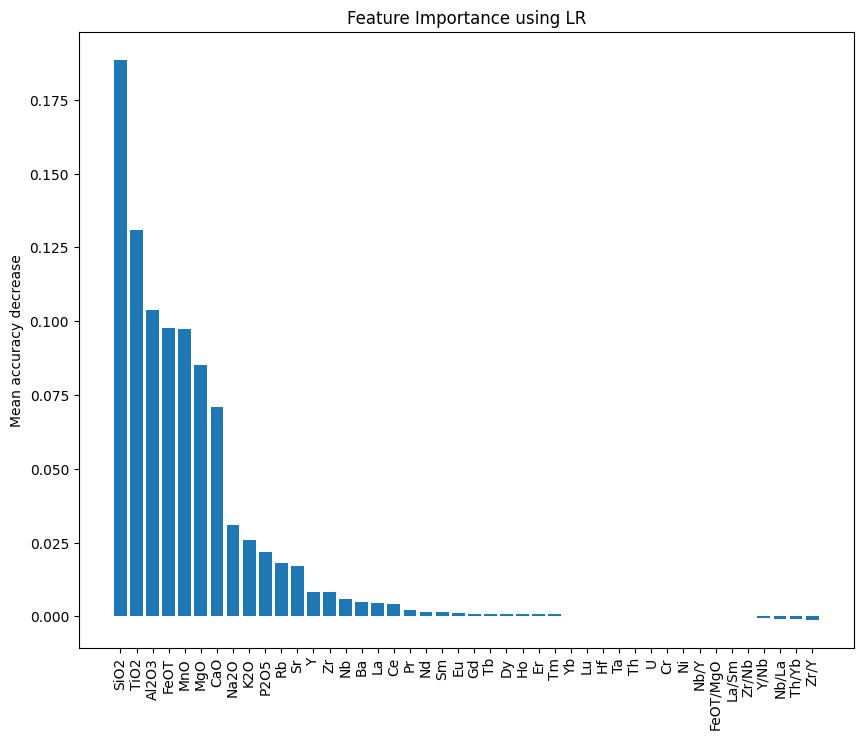

In [26]:
labels = sampled_df[features].columns.to_list()
important = pd.Series(result.importances_mean, index=labels)

idx = important.values.argsort()[::-1]
fig, ax = plt.subplots(figsize= (10,8))
ax.set_title("Feature Importance using LR")
ax.bar(important.index[idx],important[idx], align = 'center')
ax.set_xticks(np.arange(len(labels)),labels = labels,rotation = 90)
ax.set_ylabel("Mean accuracy decrease")
plt.savefig("/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/reports/figures/reg_features")
plt.show()

In [ ]:
#importances per feature